###### table

In [ ]:
'''
create table dat001 (
	partkey_month int(11) not null,
	log_idx bigint(20) not null auto_increment,
	received_dt datetime default null,
	device_id char(50) default null,
	channel_size int(10) default null,
	
	scan_no int(10) default null,
	measure_dt datetime default null,
	part_id char(50) default null,
	
	val_gold float(25, 9) default null,
	val_silver float(25, 9) default null,
	reg_dt datetime default null,
	reg_date char(10) default null,
	primary key (log_idx, partkey_month),
	key dat001__reg_date__device_id(reg_date, device_id)
) engine=innodb auto_increment=1 default charset=utf8 comment='measurement data'
/*!50100 PARTITION BY LIST (partkey_month)
(PARTITION dat001_P01 VALUES IN (1) ENGINE = InnoDB,
 PARTITION dat001_P02 VALUES IN (2) ENGINE = InnoDB,
 PARTITION dat001_P03 VALUES IN (3) ENGINE = InnoDB,
 PARTITION dat001_P04 VALUES IN (4) ENGINE = InnoDB,
 PARTITION dat001_P05 VALUES IN (5) ENGINE = InnoDB,
 PARTITION dat001_P06 VALUES IN (6) ENGINE = InnoDB,
 PARTITION dat001_P07 VALUES IN (7) ENGINE = InnoDB,
 PARTITION dat001_P08 VALUES IN (8) ENGINE = InnoDB,
 PARTITION dat001_P09 VALUES IN (9) ENGINE = InnoDB,
 PARTITION dat001_P10 VALUES IN (10) ENGINE = InnoDB,
 PARTITION dat001_P11 VALUES IN (11) ENGINE = InnoDB,
 PARTITION dat001_P12 VALUES IN (12) ENGINE = InnoDB) */
 '''

In [18]:
'''
create table dat001 (
	received_dt datetime default null,
	device_id char(50) default null,
	channel_size int(10) default null,
	
	scan_no int(10) default null,
	measure_dt datetime default null,
	part_id char(50) default null,
	
	val_gold float(25, 9) default null,
	val_silver float(25, 9) default null,
	reg_dt datetime default null,
	reg_date char(10) default null
)
'''

'\ncreate table dat001 (\n\treceived_dt datetime default null,\n\tdevice_id char(50) default null,\n\tchannel_size int(10) default null,\n\t\n\tscan_no int(10) default null,\n\tmeasure_dt datetime default null,\n\tpart_id char(50) default null,\n\t\n\tval_gold float(25, 9) default null,\n\tval_silver float(25, 9) default null,\n\treg_dt datetime default null,\n\treg_date char(10) default null\n)\n'

###### load data

In [26]:
import os

os.chdir(r'C:\My\test_basic_materials\csv')
print(os.getcwd())

C:\My\test_basic_materials\csv


In [29]:
from datetime import datetime
import pymysql


table_name = 'dat001'
host_name = 'localhost'
user_name = 'root'
user_pwd = '1'
db_name = 'test'
charset = 'utf8mb4'


def insert_line(line, parsed_header, parsed_part_id):
    print(line)
    
    # 1
    received_dt = datetime.strptime(parsed_header.get('수집 날짜:').replace('오전', 'AM').replace('오후', ':PM'), '%Y-%m-%d :%p %I:%M:%S')
    
    # 2
    device_id = parsed_header.get('계측기:')
    
    # 3
    channel_size = parsed_header.get('총 채널:')
    
    # 4
    scan_no = line[0]
    
    # 7
    val_gold = line[2]
    
    # 9
    reg_dt = datetime.now()
    
    # 10
    reg_date = datetime.now().strftime('%Y-%m-%d')
    
    # 0
    partykey_month = reg_dt.month
    
    connection = pymysql.connect(host=host_name,
                                 user=user_name,
                                 password=user_pwd,
                                 db=db_name,
                                 charset=charset,
                                 cursorclass=pymysql.cursors.DictCursor)

    try:
        with connection.cursor() as cursor:
            # Create a new record
            sql = "INSERT INTO `dat001`(partkey_month, received_dt, device_id, channel_size, scan_no, measure_dt, part_id, val_gold, val_silver, reg_dt, reg_date) VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"

            for i in range(int(channel_size)-1):
                this_part_index = i

                # 5
                measure_dt = datetime.strptime(line[1], '%Y-%m-%d %H:%M:%S:%f')
                
                # 6
                part_id = parsed_part_id[this_part_index + 3]
                
                # 7
                val_silver = line[this_part_index + 3]
            
                cursor.execute(sql, (
                    partykey_month
                    , received_dt
                    , device_id
                    , channel_size
                    , scan_no
                    , measure_dt
                    , part_id
                    , val_gold
                    , val_silver
                    , reg_dt
                    , reg_date
                ))

        # connection is not autocommit by default. So you must commit to save
        # your changes.
        connection.commit()

    finally:
        connection.close()


In [40]:
import codecs
import csv

infile_name = '0A.csv'
parsed_header = {}
parsed_part_id = None
with open(infile_name, encoding='utf16') as csvf:
    rd = csv.reader(csvf, delimiter='\t')
    is_data_line = False
    for idx, line in enumerate(rd):
        
        if is_data_line:
            insert_line(line, parsed_header, parsed_part_id)
        else:
            if line[0] == '수집 날짜:':
                parsed_header['수집 날짜:'] = line[1]
            elif line[0] == '계측기:':
                parsed_header['계측기:'] = line[1]
            elif line[0] == '총 채널:':
                parsed_header['총 채널:'] = line[1]
            elif line[0] == '스캔':
                parsed_part_id = line
                is_data_line = True
            
            
parsed_header

['1', '2017-09-18 20:31:10:576', '1.664563', '1.2499474', '1.2494557', '1.2483841', '1.2497204', '1.2496448', '1.2483589', '1.2481194', '1.2487245', '1.2553683', '1.2544354', '1.2581292', '1.2485354', '1.2526957', '1.2536538', '1.2486362', '1.253742']
['2', '2017-09-18 20:31:12:637', '1.6645756', '1.2499978', '1.2494809', '1.2483967', '1.249733', '1.2496448', '1.2483463', '1.2481194', '1.2487119', '1.2553431', '1.254448', '1.2581418', '1.248548', '1.2526957', '1.2536538', '1.2486362', '1.2537546']
['3', '2017-09-18 20:31:13:560', '1.664563', '1.2499474', '1.2494683', '1.2483967', '1.249733', '1.2496574', '1.2483337', '1.2481194', '1.2487371', '1.2553431', '1.254448', '1.2581166', '1.2485228', '1.252683', '1.2537042', '1.2486236', '1.2537672']
['4', '2017-09-18 20:31:15:060', '1.6645756', '1.2499474', '1.2494683', '1.2483841', '1.2497204', '1.2496448', '1.2483337', '1.2481068', '1.2487371', '1.2553305', '1.2544354', '1.2581418', '1.2485354', '1.2526704', '1.2536664', '1.248611', '1.2537

{'계측기:': '34970A', '수집 날짜:': '2017-09-18 오후 8:31:10', '총 채널:': '17'}

###### test codes below

In [71]:
sample_data_line = ['1', '2017-09-18 20:21:12:714', '0.16869649', '0.1264887', '0.12646982', '0.12576887', '0.12626219', '0.12547818', '0.12563044', '0.1260168', '0.12589977', '0.12855624', '0.12662964', '0.12785909', '0.12672653', '0.12747276', '0.12625841', '0.12550209', '0.12639683']
sample_data_line

['1',
 '2017-09-18 20:21:12:714',
 '0.16869649',
 '0.1264887',
 '0.12646982',
 '0.12576887',
 '0.12626219',
 '0.12547818',
 '0.12563044',
 '0.1260168',
 '0.12589977',
 '0.12855624',
 '0.12662964',
 '0.12785909',
 '0.12672653',
 '0.12747276',
 '0.12625841',
 '0.12550209',
 '0.12639683']

In [72]:
len(sample_data_line)

19

In [73]:
parsed_part_id

['스캔',
 '시간',
 '101 <ITL900> (VDC)',
 '102 <1> (VDC)',
 '103 <2> (VDC)',
 '104 <3> (VDC)',
 '105 <4> (VDC)',
 '106 <5> (VDC)',
 '107 <6> (VDC)',
 '108 <7> (VDC)',
 '109 <8> (VDC)',
 '110 <9> (VDC)',
 '111 <10> (VDC)',
 '112 <11> (VDC)',
 '113 <12> (VDC)',
 '114 <13> (VDC)',
 '115 <14> (VDC)',
 '116 <15> (VDC)',
 '117 <16> (VDC)']

In [74]:
parsed_header

{'계측기:': '34970A', '수집 날짜:': '2017-09-18 오후 8:31:10', '총 채널:': '17'}

In [75]:
from datetime import datetime

In [76]:
# 0

partkey_month = datetime.now().month
partkey_month

2

In [77]:
# 1
received_dt = datetime.strptime(parsed_header.get('수집 날짜:').replace('오전', 'AM').replace('오후', ':PM'), '%Y-%m-%d :%p %I:%M:%S')
received_dt

datetime.datetime(2017, 9, 18, 20, 31, 10)

In [78]:
# 2
device_id = parsed_header.get('계측기:')
device_id

'34970A'

In [79]:
# 3
channel_size = parsed_header.get('총 채널:')
channel_size

'17'

In [80]:
# 4
scan_no = sample_data_line[0]
scan_no

'1'

In [81]:
# 5
measure_dt = datetime.strptime(sample_data_line[1], '%Y-%m-%d %H:%M:%S:%f')
measure_dt

datetime.datetime(2017, 9, 18, 20, 21, 12, 714000)

In [82]:
this_part_index = 0

In [83]:
# 6
part_id = parsed_part_id[this_part_index + 3]
part_id

'102 <1> (VDC)'

In [84]:
# 7
val_gold = sample_data_line[2]
val_gold

'0.16869649'

In [85]:
# 8
val_silver = sample_data_line[this_part_index + 3]
val_silver

'0.1264887'

In [86]:
# 9
reg_dt = datetime.now()
reg_dt

datetime.datetime(2018, 2, 21, 9, 35, 27, 732353)

In [87]:
# 10
reg_date = datetime.now().strftime('%Y-%m-%d')
reg_date

'2018-02-21'

In [88]:
# 0
partykey_month = reg_dt.month
partykey_month

2

###### Model

In [52]:
import pymysql
import pandas as pd


table_name = 'dat001'
host_name = 'localhost'
user_name = 'root'
user_pwd = '1'
db_name = 'test'
charset = 'utf8mb4'

connection = pymysql.connect(host=host_name,
                             user=user_name,
                             password=user_pwd,
                             db=db_name,
                             charset=charset,
                             cursorclass=pymysql.cursors.DictCursor)

try:
    sql = "SELECT val_gold, val_silver FROM `dat001`"
    df = pd.read_sql(sql, connection)
finally:
    connection.close()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


test_data_ratio = 0.7
random_seed = 1004

X = df['val_gold'].values.reshape(-1,1)
y = df['val_silver']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_data_ratio, random_state=random_seed)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, explained_variance_score, accuracy_score, f1_score

rfr = RandomForestRegressor(n_estimators=10, random_state=1004)
rfr.fit(X_train_std, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1004, verbose=0, warm_start=False)

In [96]:
prediction_rfr = rfr.predict(X_test_std)

In [97]:
print('Regressor R-Squared: {:.4f}'.format(r2_score(y_test, prediction_rfr)))
print('Regressor Explained variance: {:.4f}'.format(explained_variance_score(y_test, prediction_rfr)))

Regressor R-Squared: 1.0000
Regressor Explained variance: 1.0000


###### model evaluation?

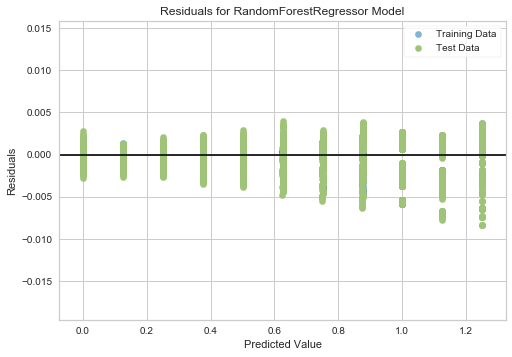

In [117]:
from yellowbrick.regressor.residuals import ResidualsPlot


rp = ResidualsPlot(rfr)
rp.fit(X_train_std, y_train)  # Fit the training data to the visualizer
rp.score(X_test_std, y_test)  # Evaluate the model on the test data
rp.poof()             # Draw/show/poof the data

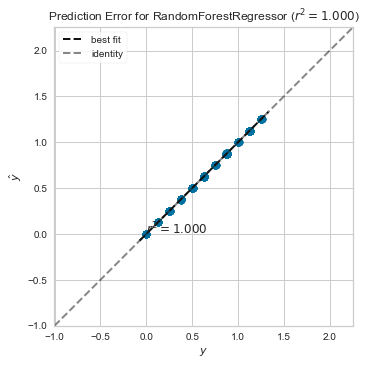

In [119]:
from yellowbrick.regressor.residuals import PredictionError

pe = PredictionError(rfr)
pe.fit(X_train, y_train)  # Fit the training data to the visualizer
pe.score(X_test, y_test)  # Evaluate the model on the test data
pe.poof()             # Draw/show/poof the data